In [1]:
import cdsapi
import os
import xarray as xr
import matplotlib.pyplot as plt

filename = "ERA5_2000-01-08_0300.grib"
if not os.path.isfile(filename):
    dataset = "reanalysis-era5-single-levels"
    request = {
        "product_type": ["reanalysis"],
        "variable": [
            "mean_wave_direction",
            "mean_wave_period",
            "significant_height_of_combined_wind_waves_and_swell",
            "peak_wave_period"
        ],
        "date": "2000-01-08",
        "time": "03:00",
        "area": [-33, 165, -48, 180]
    }

    client = cdsapi.Client()
    client.retrieve(dataset, request, filename)
else:
    ERA5 = xr.load_dataset("ERA5_2000-01-08_0300.grib", engine="cfgrib")
ERA5

/home/ubuntu/.local/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 16kB
Dimensions:     (latitude: 31, longitude: 31)
Coordinates:
    number      int64 8B 0
    time        datetime64[ns] 8B 2000-01-08T03:00:00
    step        timedelta64[ns] 8B 00:00:00
    meanSea     float64 8B 0.0
  * latitude    (latitude) float64 248B -33.0 -33.5 -34.0 ... -47.0 -47.5 -48.0
  * longitude   (longitude) float64 248B 165.0 165.5 166.0 ... 179.0 179.5 180.0
    valid_time  datetime64[ns] 8B 2000-01-08T03:00:00
Data variables:
    mwd         (latitude, longitude) float32 4kB 243.5 245.9 ... 232.3 232.4
    mwp         (latitude, longitude) float32 4kB 9.614 9.66 ... 12.15 12.01
    swh         (latitude, longitude) float32 4kB 2.087 2.074 ... 2.872 2.83
    pp1d        (latitude, longitude) float32 4kB 9.259 12.41 ... 13.67 13.6
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-27T12:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [2]:
GEFS = xr.open_dataset("gefs.wave.20000108.c00.global.0p25.grib2", engine="cfgrib")
GEFS = GEFS.sel(longitude=slice(165, 180), latitude=slice(-33,-48))
GEFS

/home/ubuntu/.local/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 41MB
Dimensions:              (step: 128, latitude: 61, longitude: 60,
                          orderedSequenceData: 3)
Coordinates:
    time                 datetime64[ns] 8B ...
  * step                 (step) timedelta64[ns] 1kB 00:00:00 ... 15 days 21:0...
    surface              float64 8B ...
  * latitude             (latitude) float64 488B -33.0 -33.25 ... -47.75 -48.0
  * longitude            (longitude) float64 480B 165.0 165.3 ... 179.5 179.8
    valid_time           (step) datetime64[ns] 1kB ...
  * orderedSequenceData  (orderedSequenceData) float64 24B 1.0 2.0 3.0
Data variables: (12/16)
    ws                   (step, latitude, longitude) float32 2MB ...
    wdir                 (step, latitude, longitude) float32 2MB ...
    u                    (step, latitude, longitude) float32 2MB ...
    v                    (step, latitude, longitude) float32 2MB ...
    swh                  (step, latitude, longitude) float32 2MB ...
    mp1                  (step, latitude, longitude) float32 2MB ...
    ...                   ...
    shww                 (step, latitude, longitude) float32 2MB ...
    shts                 (step, orderedSequenceData, latitude, longitude) float32 6MB ...
    mpww                 (step, latitude, longitude) float32 2MB ...
    mpts                 (step, orderedSequenceData, latitude, longitude) float32 6MB ...
    wvdir                (step, latitude, longitude) float32 2MB ...
    swdir                (step, orderedSequenceData, latitude, longitude) float32 6MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-03-27T12:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
JOAO = xr.open_dataset("NI-000101_000630-HSIGN.nc")
JOAO

<xarray.Dataset> Size: 120MB
Dimensions:    (time: 1456, latitude: 103, longitude: 100)
Coordinates:
  * time       (time) datetime64[ns] 12kB 2000-01-01 ... 2000-06-30T21:00:00
  * latitude   (latitude) float32 412B -42.99 -42.9 -42.81 ... -33.56 -33.46
  * longitude  (longitude) float32 400B 170.4 170.5 170.6 ... 179.4 179.5 179.6
Data variables:
    Hsig       (time, latitude, longitude) float64 120MB ...

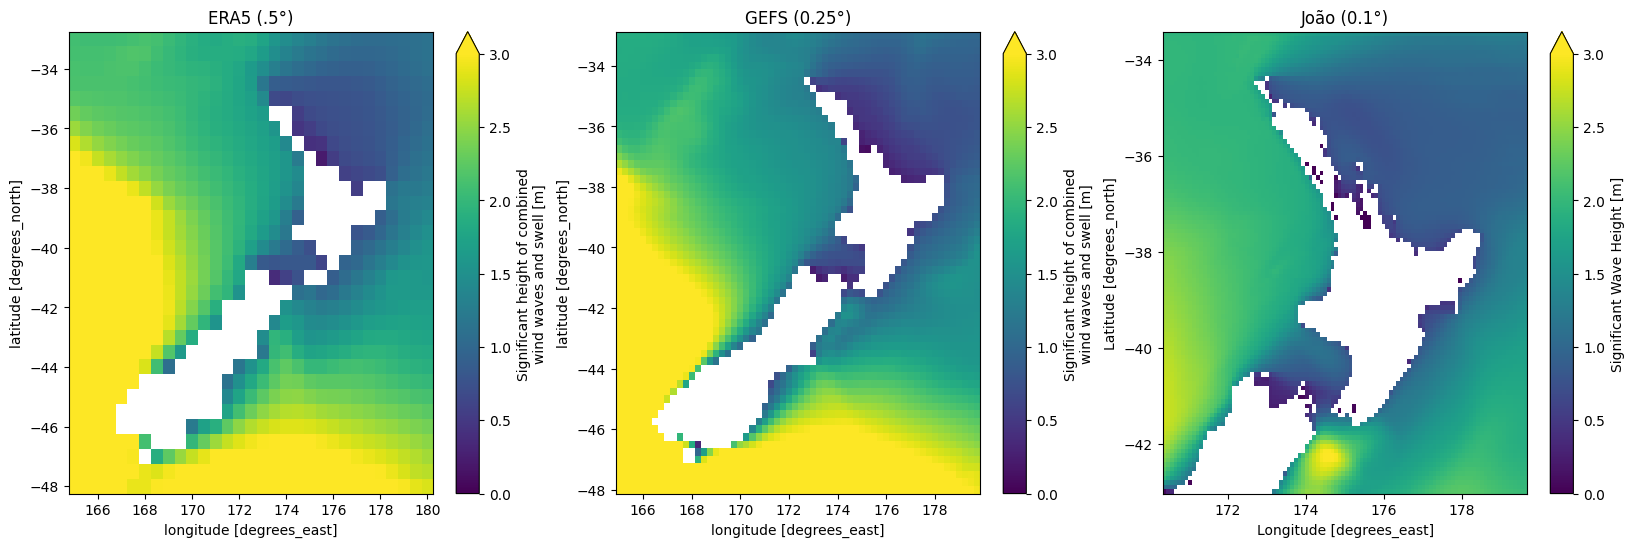

In [4]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ERA5.swh.plot(ax=ax1, vmin=0, vmax=3)
ax1.title.set_text("ERA5 (.5°)")
GEFS.swh[0].plot(ax=ax2, vmin=0, vmax=3)
ax2.title.set_text("GEFS (0.25°)")
JOAO.sel(time="2000-01-08 03:00:00").Hsig.plot(ax=ax3, vmin=0, vmax=3)
ax3.title.set_text("João (0.1°)")